<a href="https://colab.research.google.com/github/tiwarikaran/PyTorch/blob/main/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion() 

# Basic

In [ ]:
data_transform = transforms.Compose([
        transforms.RandomResizedCrop(220),
        transforms.RandomVerticalFlip(),
        transforms.RandomHorizontalFlip(),
        transforms.RandomPerspective(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    ]);type(data_transform)

torchvision.transforms.transforms.Compose

In [ ]:
train_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/data/train',
                                           transform=data_transform)

In [ ]:
train_loader = torch.utils.data.DataLoader(train_dataset,
                                             batch_size=4,
                                             shuffle=True,
                                             num_workers=8)

In [ ]:
val_dataset = datasets.ImageFolder(root='/content/drive/MyDrive/data/valid',
                                           transform=data_transform)

In [ ]:
val_loader = torch.utils.data.DataLoader(val_dataset,
                                             batch_size=4,
                                             shuffle=True,
                                             num_workers=8)

In [ ]:
train_dataset

Dataset ImageFolder
    Number of datapoints: 400
    Root location: /content/drive/MyDrive/data/train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(220, 220), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
               RandomVerticalFlip(p=0.5)
               RandomHorizontalFlip(p=0.5)
               RandomPerspective(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [ ]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    break

tensor([1, 0, 1, 1])
torch.Size([4, 3, 220, 220])


In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is can be set to 2.
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to('cpu')

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

# Advance Stuff to incorporate Training as validation into Dict.

In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(256),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(128),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
type(data_transforms)

dict

In [ ]:
data_dir = '/content/drive/MyDrive/data'

In [ ]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'valid']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=8,
                                             shuffle=True, num_workers=8)
              for x in ['train', 'valid']}

In [ ]:
image_datasets['train'].class_to_idx 

{'meme': 0, 'not_meme': 1}

In [ ]:
image_datasets['train'],image_datasets['valid']

(Dataset ImageFolder
     Number of datapoints: 400
     Root location: /content/drive/MyDrive/data/train
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(128, 128), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
                RandomHorizontalFlip(p=0.5)
                RandomVerticalFlip(p=0.5)
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ), Dataset ImageFolder
     Number of datapoints: 180
     Root location: /content/drive/MyDrive/data/valid
     StandardTransform
 Transform: Compose(
                Resize(size=128, interpolation=PIL.Image.BILINEAR)
                CenterCrop(size=(128, 128))
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ))

In [ ]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
print(dataset_sizes)
print('----------------------------')
class_names = image_datasets['train'].classes
print(class_names)
print('----------------------------')
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

{'train': 400, 'valid': 180}
----------------------------
['meme', 'not_meme']
----------------------------
cuda:0


In [ ]:
torch.cuda.is_available()

True

In [ ]:
print(torch.cuda.get_device_name(0))

Tesla P100-PCIE-16GB


In [ ]:
!nvidia-smi

Wed Jan  6 18:24:23 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.27.04    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    26W / 250W |     10MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
 ! nvcc --version 

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [ ]:
inputs, classes = next(iter(dataloaders['train']))

In [ ]:
inputs.shape,classes.shape

(torch.Size([8, 3, 256, 256]), torch.Size([8]))

In [ ]:
out = torchvision.utils.make_grid(inputs);out.shape

torch.Size([3, 260, 2066])

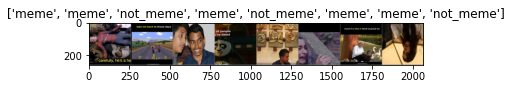

In [ ]:
imshow(out,[class_names[x] for x in classes])

Define Train Model

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch +1, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
def visualize_model(model, num_images=10):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['valid']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [ ]:
for i,l in dataloaders['valid']:
  print(i[0],l[0])
  print(i[0].shape)
  break

tensor([[[-1.4500, -1.2959, -1.0048,  ..., -1.0219, -1.0562, -1.0904],
         [-1.3987, -1.2788, -1.0733,  ..., -0.9363, -0.9877, -1.0048],
         [-1.3644, -1.2788, -1.1589,  ..., -0.9363, -0.9705, -0.9877],
         ...,
         [-0.0629, -0.1143, -0.1486,  ...,  0.1426,  0.3652,  0.8618],
         [-0.0801, -0.1486, -0.0972,  ...,  0.1426,  0.5707,  0.9132],
         [-0.1486, -0.1828, -0.1314,  ...,  0.1939,  0.5193,  0.8447]],

        [[-1.7731, -1.6155, -1.3179,  ..., -0.9678, -0.9853, -1.0028],
         [-1.7206, -1.5980, -1.3880,  ..., -0.9153, -0.9328, -0.9503],
         [-1.6681, -1.5980, -1.4755,  ..., -0.9153, -0.9328, -0.9503],
         ...,
         [-0.1800, -0.2500, -0.2850,  ..., -1.0903, -0.8452, -0.3375],
         [-0.2150, -0.2850, -0.2325,  ..., -1.1253, -0.6702, -0.3200],
         [-0.2675, -0.3200, -0.2675,  ..., -1.1078, -0.7577, -0.4426]],

        [[-1.6824, -1.5256, -1.2467,  ..., -1.1247, -1.2293, -1.3687],
         [-1.6476, -1.5081, -1.3164,  ..., -1

In [ ]:
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is can be set to 2.
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=1, gamma=0.1)

In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=5)

Epoch 1/5
----------
train Loss: 0.3479 Acc: 0.8425
valid Loss: 0.6621 Acc: 0.7167

Epoch 2/5
----------
train Loss: 0.1910 Acc: 0.9100
valid Loss: 0.3348 Acc: 0.8611

Epoch 3/5
----------
train Loss: 0.1369 Acc: 0.9475
valid Loss: 0.3521 Acc: 0.8556

Epoch 4/5
----------
train Loss: 0.1593 Acc: 0.9575
valid Loss: 0.3445 Acc: 0.8556

Epoch 5/5
----------
train Loss: 0.1554 Acc: 0.9475
valid Loss: 0.3320 Acc: 0.8611

Training complete in 7m 36s
Best val Acc: 0.861111


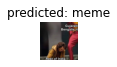

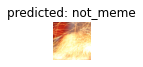

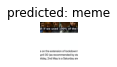

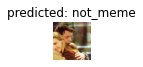

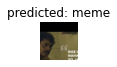

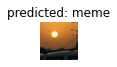

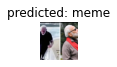

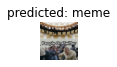

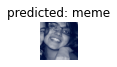

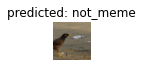

In [ ]:
visualize_model(model_ft)

In [ ]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.01, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=1, gamma=0.1)

In [ ]:
model_conv = train_model(model_conv, criterion, optimizer_conv,exp_lr_scheduler, num_epochs=5)

Epoch 1/5
----------
train Loss: 0.8784 Acc: 0.7450
valid Loss: 1.5550 Acc: 0.7278

Epoch 2/5
----------
train Loss: 0.2842 Acc: 0.9275
valid Loss: 1.0525 Acc: 0.8500

Epoch 3/5
----------
train Loss: 0.2102 Acc: 0.9350
valid Loss: 1.1813 Acc: 0.8167

Epoch 4/5
----------
train Loss: 0.2652 Acc: 0.9200
valid Loss: 1.0183 Acc: 0.8611

Epoch 5/5
----------
train Loss: 0.2034 Acc: 0.9275
valid Loss: 1.1179 Acc: 0.8222

Training complete in 7m 34s
Best val Acc: 0.861111


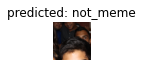

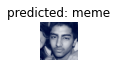

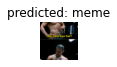

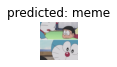

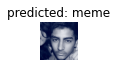

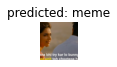

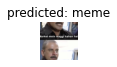

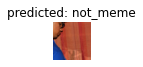

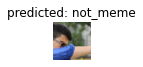

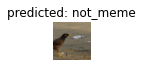

In [ ]:
visualize_model(model_conv)

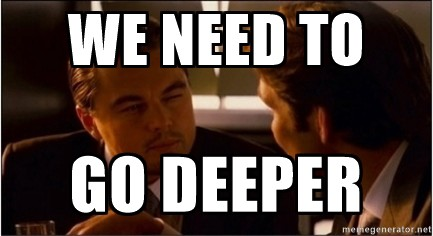

In [ ]:
model_ft = models.resnet34(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is can be set to 2.
model_ft.fc = nn.Linear(num_ftrs, len(class_names))
    
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=2, gamma=0.1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=5)

Epoch 1/5
----------
train Loss: 0.4335 Acc: 0.7725
valid Loss: 0.7008 Acc: 0.7333

Epoch 2/5
----------
train Loss: 0.1837 Acc: 0.9200
valid Loss: 0.3774 Acc: 0.8389

Epoch 3/5
----------
train Loss: 0.1257 Acc: 0.9600
valid Loss: 0.3119 Acc: 0.9056

Epoch 4/5
----------
train Loss: 0.1117 Acc: 0.9525
valid Loss: 0.2894 Acc: 0.9111

Epoch 5/5
----------
train Loss: 0.0682 Acc: 0.9825
valid Loss: 0.2705 Acc: 0.9000

Training complete in 7m 56s
Best val Acc: 0.911111


In [ ]:
model_ft = models.resnet50(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is can be set to 2.
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=2, gamma=0.1)

#training begins
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=5)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth



Epoch 1/5
----------
train Loss: 0.4090 Acc: 0.7850
valid Loss: 0.2707 Acc: 0.9000

Epoch 2/5
----------
train Loss: 0.1382 Acc: 0.9475
valid Loss: 0.2392 Acc: 0.9000

Epoch 3/5
----------
train Loss: 0.0798 Acc: 0.9725
valid Loss: 0.1862 Acc: 0.9278

Epoch 4/5
----------
train Loss: 0.0927 Acc: 0.9750
valid Loss: 0.1834 Acc: 0.9333

Epoch 5/5
----------
train Loss: 0.1039 Acc: 0.9650
valid Loss: 0.2054 Acc: 0.9278

Training complete in 7m 43s
Best val Acc: 0.933333


In [ ]:
model_ft = models.resnet101(pretrained=True)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is can be set to 2.
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=2, gamma=0.1)

#training begins
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=5)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/hub/checkpoints/resnet101-5d3b4d8f.pth



Epoch 1/5
----------
train Loss: 0.3984 Acc: 0.7900
valid Loss: 0.3369 Acc: 0.8889

Epoch 2/5
----------
train Loss: 0.1748 Acc: 0.9400
valid Loss: 0.2989 Acc: 0.8889

Epoch 3/5
----------
train Loss: 0.0872 Acc: 0.9600
valid Loss: 0.2325 Acc: 0.9111

Epoch 4/5
----------
train Loss: 0.0536 Acc: 0.9800
valid Loss: 0.1848 Acc: 0.9333

Epoch 5/5
----------
train Loss: 0.0833 Acc: 0.9750
valid Loss: 0.2116 Acc: 0.9222

Training complete in 7m 42s
Best val Acc: 0.933333


In [ ]:
model_ft = models.resnet152(pretrained=True)

num_ftrs = model_ft.fc.in_features

# Here the size of each output sample is can be set to 2.
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)

#training begins
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=15)


Epoch 1/15
----------
train Loss: 0.4246 Acc: 0.7625
valid Loss: 0.3950 Acc: 0.8667

Epoch 2/15
----------
train Loss: 0.1152 Acc: 0.9650
valid Loss: 0.6960 Acc: 0.7333

Epoch 3/15
----------
train Loss: 0.1167 Acc: 0.9525
valid Loss: 0.2611 Acc: 0.9333

Epoch 4/15
----------
train Loss: 0.0745 Acc: 0.9750
valid Loss: 0.2506 Acc: 0.9222

Epoch 5/15
----------
train Loss: 0.0728 Acc: 0.9700
valid Loss: 0.2634 Acc: 0.9167

Epoch 6/15
----------
train Loss: 0.0945 Acc: 0.9675
valid Loss: 0.2534 Acc: 0.9278

Epoch 7/15
----------
train Loss: 0.0722 Acc: 0.9850
valid Loss: 0.3222 Acc: 0.8944

Epoch 8/15
----------
train Loss: 0.0634 Acc: 0.9800
valid Loss: 0.2469 Acc: 0.9278

Epoch 9/15
----------
train Loss: 0.0650 Acc: 0.9800
valid Loss: 0.2846 Acc: 0.9111

Epoch 10/15
----------
train Loss: 0.0342 Acc: 0.9925
valid Loss: 0.2754 Acc: 0.9111

Epoch 11/15
----------
train Loss: 0.0846 Acc: 0.9700
valid Loss: 0.2401 Acc: 0.9278

Epoch 12/15
----------
train Loss: 0.0618 Acc: 0.9775
valid Los

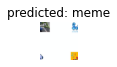

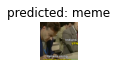

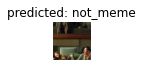

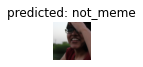

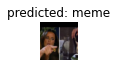

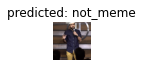

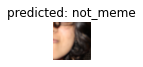

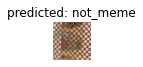

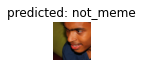

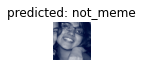

In [ ]:
visualize_model(model_ft)

In [ ]:
model_ft = models.resnext50_32x4d(pretrained=True)

num_ftrs = model_ft.fc.in_features

# Here the size of each output sample is can be set to 2.
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)

#training begins
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=15)


Downloading: "https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth" to /root/.cache/torch/hub/checkpoints/resnext50_32x4d-7cdf4587.pth



Epoch 1/15
----------
train Loss: 0.4087 Acc: 0.7875
valid Loss: 0.2724 Acc: 0.8722

Epoch 2/15
----------
train Loss: 0.2342 Acc: 0.9175
valid Loss: 0.7615 Acc: 0.7667

Epoch 3/15
----------
train Loss: 0.1184 Acc: 0.9600
valid Loss: 0.1835 Acc: 0.9278

Epoch 4/15
----------
train Loss: 0.0714 Acc: 0.9775
valid Loss: 0.1988 Acc: 0.9167

Epoch 5/15
----------
train Loss: 0.0856 Acc: 0.9725
valid Loss: 0.2995 Acc: 0.9111

Epoch 6/15
----------
train Loss: 0.0257 Acc: 0.9950
valid Loss: 0.2539 Acc: 0.9222

Epoch 7/15
----------
train Loss: 0.0316 Acc: 0.9900
valid Loss: 0.2185 Acc: 0.9278

Epoch 8/15
----------
train Loss: 0.0871 Acc: 0.9675
valid Loss: 0.2572 Acc: 0.9167

Epoch 9/15
----------
train Loss: 0.0678 Acc: 0.9775
valid Loss: 0.2126 Acc: 0.9167

Epoch 10/15
----------
train Loss: 0.0371 Acc: 0.9875
valid Loss: 0.2452 Acc: 0.9222

Epoch 11/15
----------
train Loss: 0.0945 Acc: 0.9600
valid Loss: 0.2339 Acc: 0.9222

Epoch 12/15
----------
train Loss: 0.0720 Acc: 0.9775
valid Lo

In [ ]:
model_ft = models.wide_resnet50_2(pretrained=True)

num_ftrs = model_ft.fc.in_features

# Here the size of each output sample is can be set to 2.
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=2, gamma=0.1)

#training begins
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=5)


Downloading: "https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth" to /root/.cache/torch/hub/checkpoints/wide_resnet50_2-95faca4d.pth



Epoch 1/5
----------
train Loss: 0.4090 Acc: 0.8325
valid Loss: 0.3587 Acc: 0.8444

Epoch 2/5
----------
train Loss: 0.1469 Acc: 0.9575
valid Loss: 0.3176 Acc: 0.8778

Epoch 3/5
----------
train Loss: 0.1411 Acc: 0.9450
valid Loss: 0.2979 Acc: 0.8722

Epoch 4/5
----------
train Loss: 0.1167 Acc: 0.9600
valid Loss: 0.2444 Acc: 0.9111

Epoch 5/5
----------
train Loss: 0.0814 Acc: 0.9650
valid Loss: 0.3754 Acc: 0.8889

Training complete in 8m 1s
Best val Acc: 0.911111


In [ ]:
model_ft = models.googlenet(pretrained=True)

num_ftrs = model_ft.fc.in_features

# Here the size of each output sample is can be set to 2.
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)

#training begins
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=5)


Epoch 1/5
----------
train Loss: 0.5861 Acc: 0.6750
valid Loss: 0.8040 Acc: 0.6000

Epoch 2/5
----------
train Loss: 0.3233 Acc: 0.8725
valid Loss: 0.4620 Acc: 0.8000

Epoch 3/5
----------
train Loss: 0.2488 Acc: 0.9000
valid Loss: 0.3960 Acc: 0.8500

Epoch 4/5
----------
train Loss: 0.1776 Acc: 0.9475
valid Loss: 0.3801 Acc: 0.8722

Epoch 5/5
----------
train Loss: 0.1763 Acc: 0.9500
valid Loss: 0.3819 Acc: 0.8556

Training complete in 7m 41s
Best val Acc: 0.872222


In [ ]:
model_ft = models.wide_resnet101_2(pretrained=True)

num_ftrs = model_ft.fc.in_features

# Here the size of each output sample is can be set to 2.
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)

#training begins
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=5)


Downloading: "https://download.pytorch.org/models/wide_resnet101_2-32ee1156.pth" to /root/.cache/torch/hub/checkpoints/wide_resnet101_2-32ee1156.pth



Epoch 1/5
----------
train Loss: 0.4571 Acc: 0.7875
valid Loss: 0.3827 Acc: 0.8500

Epoch 2/5
----------
train Loss: 0.1196 Acc: 0.9650
valid Loss: 0.4868 Acc: 0.8444

Epoch 3/5
----------
train Loss: 0.1211 Acc: 0.9650
valid Loss: 0.3557 Acc: 0.8500

Epoch 4/5
----------
train Loss: 0.0935 Acc: 0.9700
valid Loss: 0.3169 Acc: 0.9056

Epoch 5/5
----------
train Loss: 0.0869 Acc: 0.9675
valid Loss: 0.2817 Acc: 0.9000

Training complete in 7m 57s
Best val Acc: 0.905556


In [ ]:
model_ft = models.resnext101_32x8d(pretrained=True)

num_ftrs = model_ft.fc.in_features

# Here the size of each output sample is can be set to 2.
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=3, gamma=0.1)

#training begins
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=5)


Epoch 1/5
----------
train Loss: 0.3149 Acc: 0.8650
valid Loss: 0.3161 Acc: 0.8611

Epoch 2/5
----------
train Loss: 0.1392 Acc: 0.9475
valid Loss: 0.3664 Acc: 0.8833

Epoch 3/5
----------
train Loss: 0.1706 Acc: 0.9400
valid Loss: 0.2610 Acc: 0.9222

Epoch 4/5
----------
train Loss: 0.0782 Acc: 0.9775
valid Loss: 0.2073 Acc: 0.9444

Epoch 5/5
----------
train Loss: 0.0716 Acc: 0.9800
valid Loss: 0.2064 Acc: 0.9333

Training complete in 8m 17s
Best val Acc: 0.944444


In [ ]:
pip install efficientnet_pytorch

  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.0-cp36-none-any.whl size=16032 sha256=76d130830407a89fb1ae35c380689c52651de37ac9c5a8cbc82b935cd0f389da
  Stored in directory: /root/.cache/pip/wheels/e9/c6/e1/7a808b26406239712cfce4b5ceeb67d9513ae32aa4b31445c6
Successfully built efficientnet-pytorch


In [ ]:
from efficientnet_pytorch import EfficientNet 
model_ft = EfficientNet.from_pretrained('efficientnet-b7') 

Loaded pretrained weights for efficientnet-b7


In [ ]:
model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.0001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=4, gamma=0.1)

#training begins
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=30)

Epoch 1/30
----------
train Loss: 0.6971 Acc: 0.9225
valid Loss: 3.1086 Acc: 0.5389

Epoch 2/30
----------
train Loss: 0.8328 Acc: 0.9075
valid Loss: 3.1655 Acc: 0.5444

Epoch 3/30
----------
train Loss: 0.5437 Acc: 0.9425
valid Loss: 3.1994 Acc: 0.5500

Epoch 4/30
----------
train Loss: 0.5251 Acc: 0.9425
valid Loss: 3.2969 Acc: 0.5389

Epoch 5/30
----------
train Loss: 0.4393 Acc: 0.9575
valid Loss: 3.3904 Acc: 0.5222

Epoch 6/30
----------
train Loss: 0.6702 Acc: 0.9250
valid Loss: 3.3885 Acc: 0.5278

Epoch 7/30
----------
train Loss: 0.6718 Acc: 0.9325
valid Loss: 3.4286 Acc: 0.5222

Epoch 8/30
----------
train Loss: 0.3796 Acc: 0.9675
valid Loss: 3.4488 Acc: 0.5278

Epoch 9/30
----------
train Loss: 0.6115 Acc: 0.9375
valid Loss: 3.3850 Acc: 0.5389

Epoch 10/30
----------
train Loss: 0.6312 Acc: 0.9325
valid Loss: 3.3728 Acc: 0.5444

Epoch 11/30
----------
train Loss: 0.6631 Acc: 0.9150
valid Loss: 3.3866 Acc: 0.5333

Epoch 12/30
----------
train Loss: 0.6782 Acc: 0.9225
valid Los